In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

## K_Means on a Randomly generated dataset 

In [4]:
np.random.seed(0)

In [6]:
X,y = make_blobs(n_samples = 5000, centers =[[4,4],[-3,2],[-2,-1],[1,1]], cluster_std = 0.9)
print(X)
print(y)

[[-2.82150565  3.07098024]
 [-1.83267379 -0.93199608]
 [-3.1534842  -1.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-2.69503125  2.70020319]
 [-2.64362141  3.63035513]]
[1 2 2 ... 0 1 1]


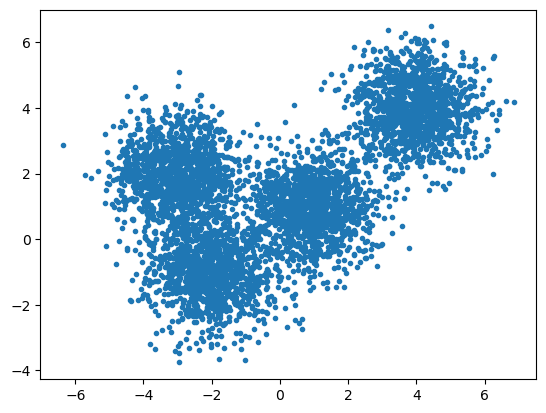

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [19]:
k_means = KMeans(init = "k-means++", n_clusters=5, n_init=12)
k_means.fit(X)

KMeans(n_clusters=5, n_init=12)

In [21]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 4, 0, ..., 1, 3, 3])

In [23]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.74205366,  0.05284217],
       [ 3.97334234,  3.98758687],
       [ 0.9652541 ,  0.97391173],
       [-3.05030717,  2.26984468],
       [-1.6998773 , -1.40268591]])

## Creating the Visual Plot

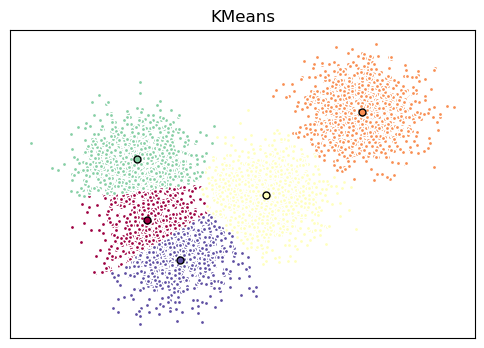

In [44]:
fig = plt.figure(figsize=(6,4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor= col, marker = '.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 5)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [46]:
import pandas as pd
file_path = "cust_segmentation.csv"
cust_df = pd.read_csv(file_path)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Preprocessing

In [57]:
df = cust_df.drop('Address', axis=1)
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,10,47,3,23,115,0.653,3.947,0.0,4.0


In [61]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
cust_dataset = StandardScaler().fit_transform(X)
cust_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling

In [105]:
clusterNum = 3
k_means = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

## Insights

In [108]:
df['Cust_km'] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cust_km,Cust_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1,1


In [110]:
df.groupby('Cust_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cust_km
Cust_km,,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761,0.0
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222,1.0
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590,2.0


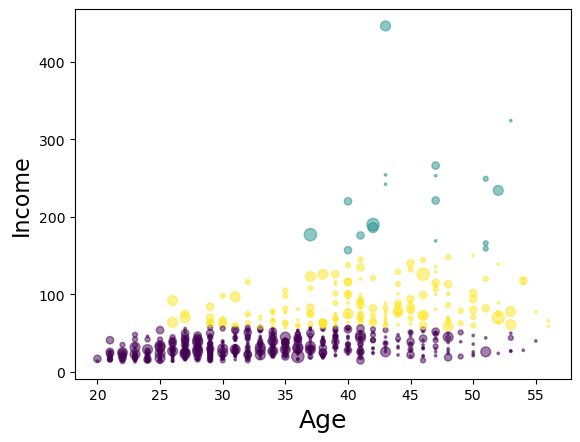

In [112]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()